# Proyecto Integrado 1

Se cuenta con una base de datos de ventas de videojuegos hasta el anho 2016. El objetivo es identificar patrones dentro de los datos que determinen el exito de un juego con miras a pronosticar las ventas y amar una campanha para el 2017.

## Paso 1: Descripcion general del dataset

Cargar el data set y describirlo

### Vista general a los datos

In [1]:
# Importar librerias
from scipy import stats as st
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Cargar los datos
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Descripcion general de los datos

In [3]:
# Descripcion general de los datos
games.info()

games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Conclusiones Paso 1
Luego de un vistazo general a los datos, podemos observar que trabajamos con dos tipos de columnas:
 - las que describen al videojuego: nombre, plataforma, etc (cualitativas)
 - las de metricas: ventas y score (cuantitativas)
 
Algunas columnas no poseen el tipo adecuado de dato y ademas contamos con varios valores nulos (principalmente en las columnas de score y rating)

En los estadisticos podemos apreciar una gran cantidad de 0s en las columnas de ventas, lo cual podria traer consecuencias en el analisis mas adelante.

## Paso 2: Preparar el dataset

- Dar formato al dataset
- Tratar los valores ausentes
- Cambiar los tipos de datos
- Agregar columnas importantes

### Cambios de formato

In [4]:
# Cambiar las columnas a lower case
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Cambios de tipo de dato

In [5]:
# Cambiar los tipo de dato
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int) #year_of_release es un numero entero, ausentes rellenados con 0

games['user_score'] = pd.to_numeric(games['user_score'].replace('tbd', '11')) #user_score es numerico

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Tratamiento de datos ausentes

In [6]:
# Tratar valores ausentes - Name
games.dropna(subset=['name'], inplace=True) #solo tenemos 2 valores ausentes en esta columna, podemos desecharlos
games.reset_index(drop=True, inplace=True)

games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


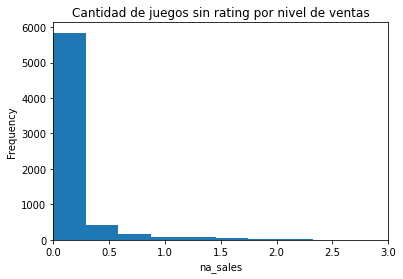

In [7]:
# Tratar valores ausentes - Rating
games['rating'] = games['rating'].fillna(' ') #rating es una categoria, podemos rellenar los ausentes con una linea vacia

games[games['rating'] == ' ']['na_sales'].plot(kind='hist', bins=100)
plt.xlim(0, 3)
plt.xlabel('na_sales')
plt.title('Cantidad de juegos sin rating por nivel de ventas')

games.info()

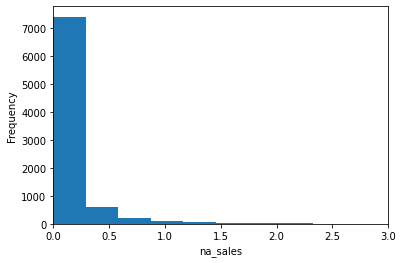

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16713 non-null  object 
 1   platform             16713 non-null  object 
 2   year_of_release      16713 non-null  int64  
 3   genre                16713 non-null  object 
 4   na_sales             16713 non-null  float64
 5   eu_sales             16713 non-null  float64
 6   jp_sales             16713 non-null  float64
 7   other_sales          16713 non-null  float64
 8   critic_score         8137 non-null   float64
 9   user_score           10014 non-null  float64
 10  rating               16713 non-null  object 
 11  critic_score_filled  16713 non-n

In [8]:
#Tratar valores ausentes - Critic Score
games[(games['critic_score'].isna())]['na_sales'].plot(kind='hist', bins=100) # observamos si los juegos con pocas ventas son los que carecen de critica
plt.xlim(0, 3)
plt.xlabel('na_sales')
plt.show()

print(games['critic_score'].describe()) # imprimimos estadisticos y determinamos el mejor valor para reemplazar valores ausentes
games['critic_score_filled'] = games['critic_score'].fillna(games['critic_score'].mean()) # media y mediana se parecen, optamos por la media

print()
games.info()

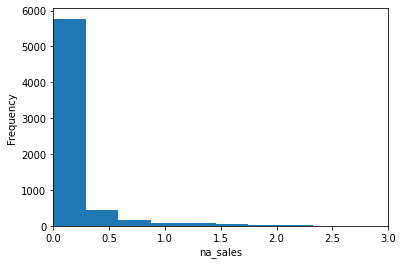

count    10014.000000
mean         8.063022
std          2.111969
min          0.000000
25%          6.800000
50%          8.000000
75%          9.200000
max         11.000000
Name: user_score, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16713 non-null  object 
 1   platform             16713 non-null  object 
 2   year_of_release      16713 non-null  int64  
 3   genre                16713 non-null  object 
 4   na_sales             16713 non-null  float64
 5   eu_sales             16713 non-null  float64
 6   jp_sales             16713 non-null  float64
 7   other_sales          16713 non-null  float64
 8   critic_score         8137 non-null   float64
 9   user_score           10014 non-null  float64
 10  rating               16713 non-null  object 
 11  critic_score_filled  16713

In [9]:
#Tratar valores ausentes - User Score
games[(games['user_score'].isna())]['na_sales'].plot(kind='hist', bins=100) # observamos si los juegos con pocas ventas son los que carecen de critica
plt.xlim(0, 3)
plt.xlabel('na_sales')
plt.show()

print(games['user_score'].describe()) # imprimimos estadisticos y determinamos el mejor valor para reemplazar valores ausentes
games['user_score_filled'] = games['user_score'].fillna(games['user_score'].mean()) # media y mediana casi iguales, optamos por la media

print()
games.info()

In [10]:
# Calcular ventas totales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_filled,user_score_filled,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,76.000000,8.000000,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,68.967679,8.063022,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.000000,8.300000,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.000000,8.000000,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,68.967679,8.063022,31.38


### Conclusiones Paso 2

Se cambiaron los nombres de las columnas a minuscula para cumplir con formatos de estilo adecuados.

Se cambiaron los tipos de dato de dos columnas:
 - year_of_release: era de tipo float, lo cual era innecesario al tratarse de enteros, y se cambio a tipo int. Durante el proceso se rellenaron los datos ausentes con 0, al tratarse de menos del 2% de los datos no hay muchos inconvenientes. 
 - user_score: era un string, lo cual es contraproducente al tratarse de un puntaje, se cambio a tipo float. Durante el proceso se considero los valores TBD como 11 para tenerlos mapeados fuera del rango usual de 0 a 10.
 
Se trataron casos de valores ausentes:
 - casos sencillos: tratamiento sin mayor analisis
     - en la columna name solo existen dos valores ausentes, se opta por descartar las filas al ser una cantidad infima
     - en la columna rating se reemplazan los Nan por una cadena con espacio en blanco, no tenemos un valor optimo de remplazo y este valor nos permite distiguir valores reemplazados de originales 
 - casos a analizar: requieren observacion de metricas o distribuciones
     - en la columna critic_score se remplazan los valores ausentes por la media y se guardan en una nueva columna
     - en la columna user_score se reemplazan los valores ausentes por la media y se guardan en una nueva columna
     
Los valores ausentes en la columna name puede ser debido a un registro incompleto.

En el caso de la columna rating, pudimos observar que los valores ausentes se asocian a juegos que no alcanzaron grandes volumenes de ventas (escogimos analizar ventas en USA). Puede que no haya sido rentable para el estudio someter al juego ante el ESRB.

En el caso de las columnas de score, observamos que los valores ausentes tienen una asociacion similar a los de la columna rating: juegos poco populares que no fueron sometidos a critica.

Finalmente, se calculan las ventas totales sumando las ventas en todas las regiones. Este dato sera util para la seccion de analisis

## Paso 3: Analisis de Datos

 - Observar la cantidad de juegos lanzados por anho
 - Observar las ventas totales entre distintas plataformas a lo largo del tiempo
 - Determinar el periodo de tiempo relevante para el pronostico del 2017
 - Determinar las plataformas mas rentables
 - Crear un diagrama de cajas para las ventas globales por plataforma
 - Correlacionar como las resenhas afectan las ventas de una plataforma
 - Comparar las ventas de los mismos juegos entre plataformas
 - Observar la distribucion de ventas por genero

### Juegos lanzados por anho

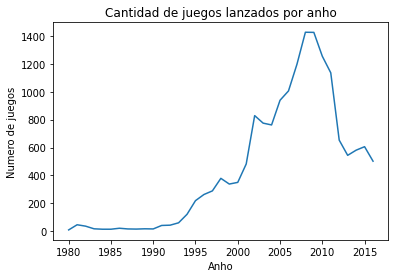

In [11]:
# Agrupar juegos por anho y contamos la cantidad de juegos lanzados
games.groupby(by='year_of_release').count()['name'][1:].plot() #ignoramos los valores ausentes en el indice 0
plt.xlabel('Anho')
plt.ylabel('Numero de juegos')
plt.title('Cantidad de juegos lanzados por anho')
plt.show()

Podemos apreciar que a partir de los anhos 90 comienza un incremento en la cantidad de juegos lanzados por anho. Este crecimiento de los anhos 90 llega a una meseta antes del boom de los anhos 2000. Este boom llega a un pico de produccion de juegos por el anho 2007, seguida de una caida hasta el anho 2012.

De esta informacion, vemos que antes de los 90's la industria era muy diferente y esos datos ya no son relevantes. Dentro de los 2000 hay que considerar que la subida y caida en produccion de juegos es un evento muy particular y podria sesgar las predicciones que querramos hacer a futuro.

Es necesario escoger un periodo de tiempo que refleje el estado actual del mercado. Este debe ser lo suficientemente corto para ser relevante y lo suficientemente extenso para no obviar informacion importante.

Un analisis mas profundo nos permitira deteriminar con mayor exactitud que anhos utilizar para el analisis.

### Juegos lanzados por anho por plataforma

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

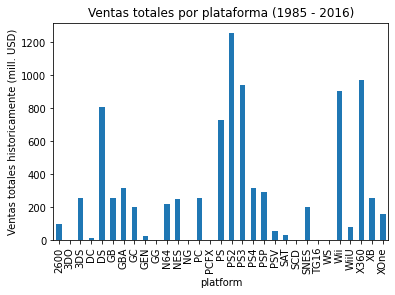

In [12]:
# Escoger las plataformas con mayor cantidad historica de ventas totales
games.groupby(by=['platform']).sum()['total_sales'].plot(kind='bar')
plt.ylabel('Ventas totales historicamente (mill. USD)')
plt.title('Ventas totales por plataforma (1985 - 2016)')

top10_platforms_by_total_sales = games.groupby(by=['platform']).sum()['total_sales'].sort_values(ascending=False)[0:10].index.tolist()
top10_platforms_by_total_sales

Se puede observar que 6 plataformas superan con creces a las demas: DS, PS, PS2, PS3, Wii y X360. Escogemos las 10 con mayor catidad historica de ventas para trabajar.

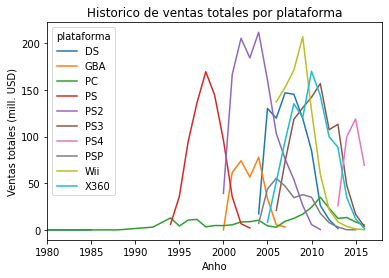

In [13]:
# Agrupamos juegos por plataforma (top 10) y anho calculamos las ventas totales
games[games['platform'].isin(top10_platforms_by_total_sales)].groupby(by=['platform', 'year_of_release']).sum()['total_sales'].unstack(level=0).plot()
plt.xlim([1980, 2018])
plt.xlabel('Anho')
plt.ylabel('Ventas totales (mill. USD)')
plt.legend(title='plataforma')
plt.title('Historico de ventas totales por plataforma')
plt.show()

In [14]:
# Buscamos las plataformas (top10) que ya no tienen ventas
top10_platforms_by_total_sales_current = games[(games['platform'].isin(top10_platforms_by_total_sales)) & (games['year_of_release'] == 2016)]['platform'].unique().tolist()
top10_platforms_by_total_sales_not_current = [i for i in top10_platforms_by_total_sales if i not in top10_platforms_by_total_sales_current]
top10_platforms_by_total_sales_not_current

['PS2', 'DS', 'PS', 'GBA', 'PSP']

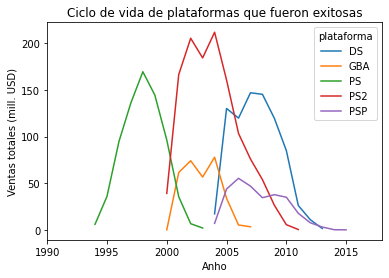

In [15]:
# Agrupamos juegos por plataforma (top 10 sin ventas al 2016) y anho calculamos las ventas totales
games[games['platform'].isin(top10_platforms_by_total_sales_not_current)].groupby(by=['platform', 'year_of_release']).sum()['total_sales'].unstack(level=0).plot()
plt.xlim([1990, 2018])
plt.xlabel('Anho')
plt.ylabel('Ventas totales (mill. USD)')
plt.legend(title='plataforma')
plt.title('Ciclo de vida de plataformas que fueron exitosas')
plt.show()

Podemos observar que de las 10 plataformas con mayor catidad historica de ventas totales, hay 5 que ya no cuentan con ventas para el anho 2016: PS, GBA, PS2, DS, PSP.



In [16]:
# Calculamos anhos de vida promedio de una plataforma
(
games[(games['platform'].isin(top10_platforms_by_total_sales_not_current)) & (games['year_of_release'] > 0)]
    .groupby(by='platform')['year_of_release'].max() - 
games[(games['platform'].isin(['PS', 'GBA', 'PS2', 'DS', 'PSP'])) & (games['year_of_release'] > 1990)].
    groupby(by='platform')['year_of_release'].min()
).mean()

9.4

In [17]:
# Calculamos cuanto toma una plataforma en llegar a su pico
(
pd.pivot_table(games[games['platform'].isin(top10_platforms_by_total_sales_not_current)], index='platform', columns='year_of_release', values='total_sales', aggfunc='sum').idxmax(axis=1) -
games[(games['platform'].isin(['PS', 'GBA', 'PS2', 'DS', 'PSP'])) & (games['year_of_release'] > 1990)].
    groupby(by='platform')['year_of_release'].min()
).mean()

3.4

In [18]:
# Calculamos cuanto toma una plataforma en su pico en desaparecer
(
games[(games['platform'].isin(['PS', 'GBA', 'PS2', 'DS', 'PSP'])) & (games['year_of_release'] > 1990)].
    groupby(by='platform')['year_of_release'].max() -
pd.pivot_table(games[games['platform'].isin(top10_platforms_by_total_sales_not_current)], index='platform', columns='year_of_release', values='total_sales', aggfunc='sum').idxmax(axis=1)
).mean()

6.0

Del grafico de barras podemos apreciar que existen ciertas plataformas con muchas mayores ventas historicamente que otras. Escogimos 10 para un analisis preeliminar, de las cuales 5 ya no poseen ventas. Estas son utiles para analizar el ciclo de vida de una paltaforma exitosa.

Del grafico del ciclo de vida de una plataforma exitosa podemos apreciar que este ciclo tiene 3 hitos: la plataforma es introducida al mercado, llega a un apogeo de ventas de juegos y eventualmente desaparece. Segun los datos proporcionados, este ciclo dura poco menos de 9 anhos y medio. De estos 9 anhos y medio, las plataformas toman alderedor de 3 anhos y medio en llegar a su pico y 6 anhos desde su pico hasta desaparecer.

### Plataformas y margen de tiempo relevantes


In [19]:
# Determinamos las plataformas relevantes
current_platforms = games[games['year_of_release'] == 2016]['platform'].unique() #es relevante si aun vende juegos
current_platforms

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

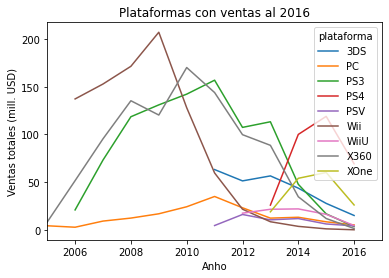

In [20]:
# Agrupamos por plataformas (relevante) y por anho y calculamos las ventas totales
games[games['platform'].isin(current_platforms)].groupby(by=['platform', 'year_of_release']).sum()['total_sales'].unstack(level=0).plot()
plt.xlim([2005, 2017])
plt.xlabel('Anho')
plt.ylabel('Ventas totales (mill. USD)')
plt.legend(title='plataforma')
plt.title('Plataformas con ventas al 2016')
plt.show()

Se puede apreciar que de las plataformas que aun cuentan con ventas al 2016, algunas ya estan por terminar su ciclo. Estas no nos ayudan para determinar un periodo de tiempo relevante para el analisis.

Buscamos seleccionar las plataformas que aun puedan generar ventas considerables durante los proximos anhos. Tomar en cuenta el ciclo de vida de estas plataformas aun vigentes es importante para construir un modelo para el 2017.

In [21]:
# Obtenemos las 3 paltaformas con mayores ventas durante el 2016
games[games['year_of_release'] == 2016].groupby(by='platform').sum()['total_sales'].sort_values(ascending=False).head(3)

platform
PS4     69.25
XOne    26.15
3DS     15.14
Name: total_sales, dtype: float64

Las 3 plataformas con mayores ventas durante el 2016 fueron: PS4, XOne y 3DS. De estas 3, el 3DS es la que menor cantidad de ventas tiene, asi como la plataforma mas antigua.

Para el analisis, seria conveniente tener toda la informacion del cilo de vida de la PS4 y el XOne. Por ello, consideraremos como datos relevantes solo aquellos de juegos lanzadados desde el 2013 en adelante.

### Trabajar con datos relevantes

In [22]:
# Generamos una nueva df solo con la informacion relevante
games_relevant = games[games['year_of_release'] >= 2013]
games_relevant.reset_index(drop=True, inplace=True)

games_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 2233 non-null   object 
 1   platform             2233 non-null   object 
 2   year_of_release      2233 non-null   int64  
 3   genre                2233 non-null   object 
 4   na_sales             2233 non-null   float64
 5   eu_sales             2233 non-null   float64
 6   jp_sales             2233 non-null   float64
 7   other_sales          2233 non-null   float64
 8   critic_score         991 non-null    float64
 9   user_score           1300 non-null   float64
 10  rating               2233 non-null   object 
 11  critic_score_filled  2233 non-null   float64
 12  user_score_filled    2233 non-null   float64
 13  total_sales          2233 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 244.4+ KB


Hemos ignorado todos los datos de videojuegos que fueron lanzados antes del 2013, asi como de videojuegos sin anho de lanzamiento. Esto reduce tambien el numero de plataformas, ya que muchas plataformas no tienen juegos lanzados luego del 2012. 

Nuestros datos se han reducido a unas 2000 filas de unas 16000, una reduccion de mas del 80%.

### Plataformas Lideres en ventas

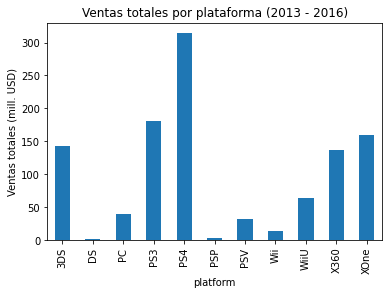

In [23]:
# Identificar plataformas lideres en ventas
games_relevant.groupby(by=['platform']).sum()['total_sales'].plot(kind='bar')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas totales por plataforma (2013 - 2016)')
plt.show()

Se observa que 5 plataformas sobresalen por encima del resto: PS4, PS3, 3DS, XOne y X360. Esto nos da un indicio de plataformas potencialmente rentables. Sin embargo, de estas plataformas, algunas pueden ya no tener ventas al 2016 o estar cerca de culminar su ciclo de vida.

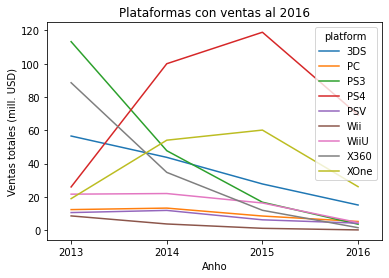

In [24]:
# Agrupamos los datos del periodo relevante por anho y por plataforma y calculamos ventas totales, excluimos plataformas sin ventas al 2016
games_relevant[games_relevant['platform'].isin(current_platforms)].groupby(by=['platform', 'year_of_release']).sum()['total_sales'].unstack(level=0).plot()
plt.xlim(2012.75, 2016.25)
plt.xticks([2013, 2014, 2015, 2016])
plt.xlabel('Anho')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Plataformas con ventas al 2016')
plt.show()

Podemos ver que todas las plataformas presentan una caida en ventas. Esto puede ser a consecuencia de la caida en cantidad de juegos lanzados a partir del anho 2010.

Para esquivar este inconveniente, puede ser mas conveniente analizar el total de ventas por cada juego. Asi podemos observar si las ventas por cada juego crecen, en lugar de si crecen las ventas totales.

De las plataformas lideres en este periodo, la PS3 y el X360 estan en los ultimos anhos de su ciclo de vida y no seria muy rentable invertir en ellas.

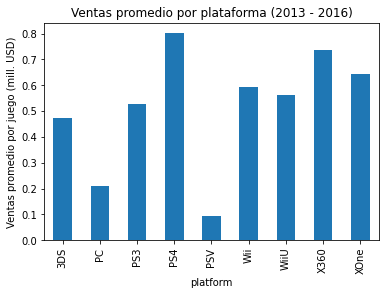

In [25]:
# Identificar plataformas lideres en ventas por juego, excluimos plataformas sin ventas al 2016
games_relevant[games_relevant['platform'].isin(current_platforms)].groupby(by=['platform']).mean()['total_sales'].plot(kind='bar')
plt.ylabel('Ventas promedio por juego (mill. USD)')
plt.title('Ventas promedio por plataforma (2013 - 2016)')
plt.show()

Vemos que si consideramos las ventas por juego, el panorama es un poco distinto. Las plataformas lideres anteriores se mantienen , mas toman relevancia otros competidores:  Wii y WiiU. De todas maneras, aun debemos considerar que algunas de estas plataformas lideres en este periodo se encuentran a finales de su ciclo de vida: PS3, X360.

Las plataformas sin ventas al 2016 ya fueron excluidas del analisis.

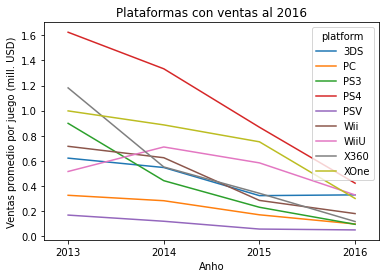

In [26]:
# Agrupamos los datos del periodo relevante por anho y por plataforma y calculamos ventas por juego
games_relevant[games_relevant['platform'].isin(current_platforms)].groupby(by=['platform', 'year_of_release']).mean()['total_sales'].unstack(level=0).plot()
plt.xlim(2012.75, 2016.25)
plt.xticks([2013, 2014, 2015, 2016])
plt.xlabel('Anho')
plt.ylabel('Ventas promedio por juego (mill. USD)')
plt.title('Plataformas con ventas al 2016')
plt.show()

Un analisis a traves del tiempo revela que incluso tomando las ventas por juego, vemos que las plataromas siguen sufriendo una caida en este periodo.

Tomando en consideracion ambas graficas, las plataformas con mayor potencial de rentabilidad serian: PS4, XOne y 3DS. La PS4 siendo la mas rentable de todas las plataformas y el XOne en segundo lugar. La 3DS aun cuenta con unos anhos mas en su cilco de vida, de acorde al grafico de ventas totales, y sus ventas promedio por videojuego aun son competitivas con las del XOne. La WiiU, a pesar de tener ventas promedio por videojuego algo competitivas, lamentablemente nunca conto con ventas totales prometedoras.

### Diagrama de cajas por plataforma

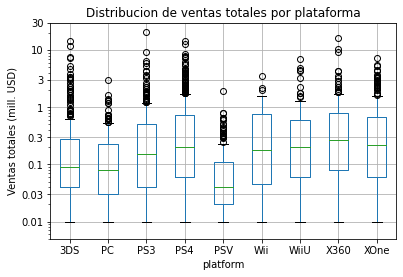

In [27]:
# Tomamos los datos del periodo relevante, excluimos plataformas que no tienen ventas al 2016 y trazamos los diagramas de ventas totales
games_relevant[games_relevant['platform'].isin(current_platforms)].boxplot(column='total_sales', by='platform')
plt.yscale('log') #escala logaritmica para mejor visualizacion
plt.yticks(ticks=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], labels=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
plt.ylim(0.005, 30)
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Distribucion de ventas totales por plataforma')
plt.suptitle('')
plt.show()

Observando las distribuciones de las ventas totales por plataforma se puede apreciar que todas ellas (salvo PSV) presentan la mayor parte de sus datos agrupados en el rango de 0.03 y 1 millones de dolares y medianas entre los 0.1 y 0.3 millones de dolares. Sin embargo, por diagramas anteriores sabemos que las plataformas difieren mucho en cuanto a ventas totales.

Esto es facilmente explicable observando los datos atipicos. La escala logaritmica nos permite apreciar que las plataformas mas exitsas poseen una gran cantidad de datos atipicos con ventas superiores al millon de dolares. Estos juegos son los que influencian en su mayor parte el exito de una plataforma, en terminos de ventas totales.

Si no tomamos estos datos atipicos en consideracion, es probable que los diagramas de cajas sean mas parecidos.

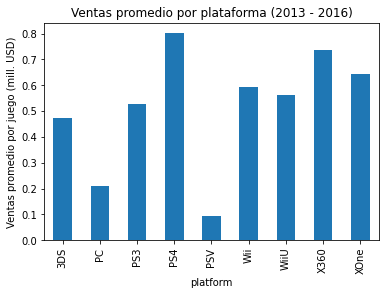

In [28]:
# Analizamos las ventas promedio de cada plataforma, excluimos plataformas sin ventas al 2016
games_relevant[games_relevant['platform'].isin(current_platforms)].groupby(by=['platform']).mean()['total_sales'].plot(kind='bar')
plt.ylabel('Ventas promedio por juego (mill. USD)')
plt.title('Ventas promedio por plataforma (2013 - 2016)')
plt.show()

El grafico de barras de ventas promedio por plataforma hace hincapie en lo anteriormente mencionado: las plataformas mas exitosas cuentan con una gran cantidad de datos atipicos con ventas por encima del millon de dolares. Estos juegos altamente exitosos impulsan las ventas totales (y promedio) de esas plataformas.

Las plataformas con mayores ventas promedio son tambien aquellas cuyos datos atipicos (todos) superan el millon de dolares: PS3, PS4, Wii, WiiU, X360, XOne.

### Correlacion entre resenhas y ventas

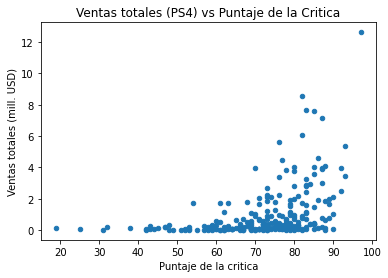

Correlacion:  0.40656790206178123


In [29]:
# Escogemos la plataforma PS4, analizamos la resenha de la critica, excluimos juegos sin resenha
games_relevant[(games_relevant['critic_score'].notna()) & (games_relevant['platform'] == 'PS4')].plot(kind='scatter', x='critic_score', y='total_sales')
plt.xlabel('Puntaje de la critica')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas totales (PS4) vs Puntaje de la Critica')
plt.show()

print('Correlacion: ', 
games_relevant[(games_relevant['critic_score'].notna()) & (games_relevant['platform'] == 'PS4')][['critic_score', 'total_sales']].corr().iloc[0,1]
)

En este grafico preeliminar, pareciera que no existe mucha correlacion entre el puntaje de la critica y las ventas de los videojuegos (R = 0.41). Sin embargo, sabemos que esta plataforma cuenta con juegos altamente exitosos que no necesariamente van a seguir los patrones del resto. Es conveniente hacer un analisis de los juegos que no alcanzan estas cifras y compararlos con aquellos que si.

In [30]:
# Calculamos el limite para datos atipicos
IQR = (
    games_relevant[(games_relevant['critic_score'].notna()) & (games_relevant['platform'] == 'PS4')]['total_sales']
    .quantile(0.75) - 
    games_relevant[(games_relevant['critic_score'].notna()) & (games_relevant['platform'] == 'PS4')]['total_sales']
    .quantile(0.25)
)
outlier_threshold = (
    games_relevant[(games_relevant['critic_score'].notna()) & (games_relevant['platform'] == 'PS4')]['total_sales']
    .quantile(0.75)
) + 1.5 * IQR
print(f'Los datos atipicos tienen ventas superiores a {outlier_threshold} millones de dolares')

Los datos atipicos tienen ventas superiores a 2.6075 millones de dolares


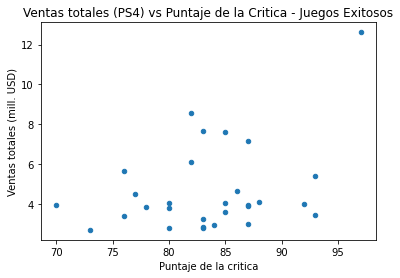

Correlacion de juegos exitosos:  0.35991117303084297


In [31]:
# Analizamos el puntaje de la critica de los juegos con mayor cantidad de ventas, excluimos juegos sin resenha
(
    games_relevant[(games_relevant['critic_score'].notna()) & 
               (games_relevant['platform'] == 'PS4') & 
               (games_relevant['total_sales'] >= outlier_threshold)]
    .plot(kind='scatter', x='critic_score', y='total_sales')
)
plt.xlabel('Puntaje de la critica')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas totales (PS4) vs Puntaje de la Critica - Juegos Exitosos')
plt.show()

print('Correlacion de juegos exitosos: ', 
games_relevant[(games_relevant['critic_score'].notna()) & (games_relevant['platform'] == 'PS4') & (games_relevant['total_sales'] >= outlier_threshold)][['critic_score', 'total_sales']]
      .corr().iloc[0,1]
)

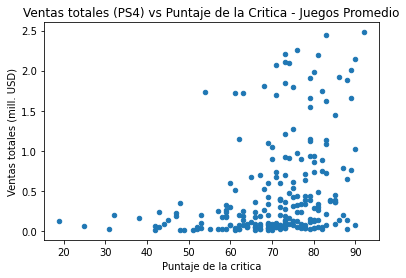

Correlacion de juegos promedio:  0.3328974165769362


In [32]:
# Analizamos el puntaje de la critica de los demas juegos, excluimos juegos sin resenha
(
    games_relevant[(games_relevant['critic_score'].notna()) & 
               (games_relevant['platform'] == 'PS4') & 
               (games_relevant['total_sales'] < outlier_threshold)]
    .plot(kind='scatter', x='critic_score', y='total_sales')
)
plt.xlabel('Puntaje de la critica')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas totales (PS4) vs Puntaje de la Critica - Juegos Promedio')
plt.show()

print('Correlacion de juegos promedio: ', 
games_relevant[(games_relevant['critic_score'].notna()) & (games_relevant['platform'] == 'PS4') & (games_relevant['total_sales'] < outlier_threshold)][['critic_score', 'total_sales']]
      .corr().iloc[0,1]
)

Luego de un analisis mas a fondo, podemos ver que la resenha de la critica no se correlaciona mucho con las ventas (R < 0.4), independiente de si nos referimos a un juego altamente exitoso (ventas superiores a 2.61 millones de dolares) o al resto de juegos.

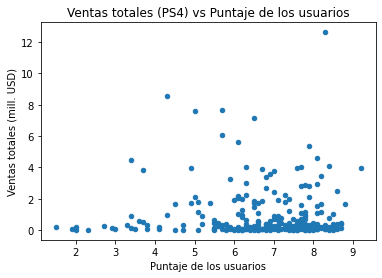

Correlacion:  -0.03195711020455685


In [33]:
# Escogemos la plataforma PS4, analizamos la resenha de los usuarios, excluimos juegos sin resenha
(
    games_relevant[(games_relevant['user_score'].notna()) &
                  (games_relevant['platform'] == 'PS4') &
                  (games_relevant['user_score'] <= 10)]
    .plot(kind='scatter', x='user_score', y='total_sales')
)
plt.xlabel('Puntaje de los usuarios')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas totales (PS4) vs Puntaje de los usuarios')
plt.show()

print('Correlacion: ', 
games_relevant[(games_relevant['user_score'].notna()) &
                  (games_relevant['platform'] == 'PS4') &
                  (games_relevant['user_score'] <= 10)][['user_score', 'total_sales']].
      corr().iloc[0,1]
)

Es interesante observar que la resenha de los usuarios no tiene correlacion con las ventas de los juegos de la PS4 (a pesar de ser negativa, es bastante pequenha y la consideramos como 0), ya que son finalmente los usuarios quienes se recomiendan juegos entre si dentro de sus comunidades y quienes compran los juegos. De igual forma que con el puntaje de la critica, observaremos si existe variarion entre juegos con ventas atipicas y los demas juegos.

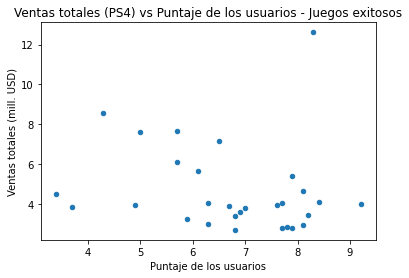

Correlacion de juegos altamente exitosos:  -0.1663552250241903


In [34]:
# Analizamos el puntaje de los usuarios de los juegos con mayor cantidad de ventas, excluimos juegos sin resenha
(
    games_relevant[(games_relevant['user_score'].notna()) &
                  (games_relevant['platform'] == 'PS4') &
                  (games_relevant['user_score'] <= 10) &
                  (games_relevant['total_sales'] >= outlier_threshold)]
    .plot(kind='scatter', x='user_score', y='total_sales')
)
plt.xlabel('Puntaje de los usuarios')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas totales (PS4) vs Puntaje de los usuarios - Juegos exitosos')
plt.show()

print('Correlacion de juegos altamente exitosos: ', 
games_relevant[(games_relevant['user_score'].notna()) &
                  (games_relevant['platform'] == 'PS4') &
                  (games_relevant['user_score'] <= 10) &
                  (games_relevant['total_sales'] >= outlier_threshold)][['user_score', 'total_sales']].
      corr().iloc[0,1]
)

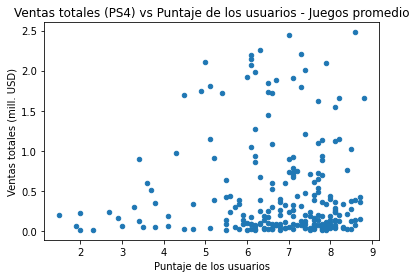

Correlacion de juegos promedio:  -0.0048711797625116075


In [35]:
# Analizamos el puntaje de los usuarios de los demas juegos, excluimos juegos sin resenha
(
    games_relevant[(games_relevant['user_score'].notna()) &
                  (games_relevant['platform'] == 'PS4') &
                  (games_relevant['user_score'] <= 10) &
                  (games_relevant['total_sales'] < outlier_threshold)]
    .plot(kind='scatter', x='user_score', y='total_sales')
)
plt.xlabel('Puntaje de los usuarios')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas totales (PS4) vs Puntaje de los usuarios - Juegos promedio')
plt.show()

print('Correlacion de juegos promedio: ', 
games_relevant[(games_relevant['user_score'].notna()) &
                  (games_relevant['platform'] == 'PS4') &
                  (games_relevant['user_score'] <= 10) &
                  (games_relevant['total_sales'] < outlier_threshold)][['user_score', 'total_sales']].
      corr().iloc[0,1]
)

Ahora podemos ver que la resenha de los usuarios no solo no se correlaciona con las ventas de los juegos promedio, sino que se correlaciona ligeramente de forma negativa (R = -0.17) con las ventas de los juegos altamente exitosos (ventas superiores a 2.61 millones de dolares).

Es curioso observar dentro de los juegos con mayor cantida de ventas este comportamiento con respecto a las resenhas de los usuarios. Mas dada la debil correlacion exitenste es solo eso, una curiosidad de los datos.

Finalmente, luego de analizar minuciosamente tanto las resenhas de la critica como la de los usuarios para los juegos de la PS4, podemos decir que:
 - no existe una correlacion entre las ventas y la resenha de los usuarios
 - existe una correlacion moderada entre las ventas y la resenha de la critica
 
Recordemos que en este analisis hemos excluido (por obvias razones) a los juegos que carecen de una resenha. Estos juegos suelen tener un nivel bajo de ventas. 

### Comparacion de ventas del mismo juego entre plataformas

In [36]:
# Encontramos los juegos multiplataforma
xplatform_games = games_relevant.groupby(by='name')['platform'].count().to_frame().query('platform > 1').index.tolist()
xplatform_games

[" Frozen: Olaf's Quest",
 '2014 FIFA World Cup Brazil',
 '3rd Super Robot Wars Z Jigoku Hen',
 '3rd Super Robot Wars Z: Tengoku-Hen',
 '7 Days to Die',
 'Accel World: Kasoku no Chouten',
 "Adventure Time: Explore the Dungeon Because I Don't Know!",
 'Adventure Time: Finn & Jake Investigations',
 'Adventure Time: The Secret of the Nameless ',
 'Adventure Time: The Secret of the Nameless Kingdom',
 'Aegis of Earth: Protonovus Assault',
 "Agatha Christie's The ABC Murders",
 "Akiba's Trip: Undead & Undressed",
 'Alien: Isolation',
 'Aliens: Colonial Marines',
 'Angry Birds Star Wars',
 'Ar Nosurge: Ode to an Unborn Star',
 "Army of Two: The Devil's Cartel",
 'Arslan: The Warriors of Legend',
 "Assassin's Creed Chronicles",
 "Assassin's Creed IV: Black Flag",
 "Assassin's Creed Syndicate",
 "Assassin's Creed The Ezio Collection",
 "Assassin's Creed: Rogue",
 "Assassin's Creed: Unity",
 'Assetto Corsa',
 'Atari Flashback Classics: Volume 1',
 'Atari Flashback Classics: Volume 2',
 'Atelier

In [37]:
# Analizamos la variacion que existe en las ventas del mismo juego entre distintas plataformas
pd.pivot_table(games_relevant[games_relevant['name'].isin(xplatform_games)],
               index='name', columns='platform', aggfunc='sum', values='total_sales').agg(['std', 'mean'], axis=1)

,std,mean
Frozen: Olaf's Quest,0.056569,0.550
2014 FIFA World Cup Brazil,0.127279,0.520
3rd Super Robot Wars Z Jigoku Hen,0.028284,0.210
3rd Super Robot Wars Z: Tengoku-Hen,0.028284,0.170
7 Days to Die,0.063640,0.095
...,...,...
Zero Escape: Zero Time Dilemma,0.014142,0.070
ZombiU,0.035355,0.035
Zombie Army Trilogy,0.063640,0.155
Zoo Tycoon (2013),0.190919,0.225


Observamos que las desviaciones entre las ventas del mismo juego en distintas plataformas varian de juego en juego, lo que era de esperarse. Sin embargo, este valor por si solo no nos dice mucho, ya que no es lo mismo una desviacion de 1 en una distribucion con media de 10 que la misma desviacion de 1 en una distribucion con media de 100. Es por ello que es preferible analizar que porcentaje de la media representa la desviacion.

In [38]:
# Calculamos la nueva metrica y observamos como varia de juego en juego
xplatform_games_total_sales_std_mean = pd.pivot_table(games_relevant[games_relevant['name'].isin(xplatform_games)],
               index='name', columns='platform', aggfunc='sum', values='total_sales').agg(['std', 'mean'], axis=1)

xplatform_games_total_sales_std_mean['std_over_mean'] = xplatform_games_total_sales_std_mean['std'] / xplatform_games_total_sales_std_mean['mean']

xplatform_games_total_sales_std_mean.describe()


,std,mean,std_over_mean
count,473.000000,473.000000,473.000000
mean,0.304232,0.458241,0.566976
std,0.690401,0.911656,0.316011
min,0.000000,0.010000,0.000000
25%,0.021213,0.055000,0.321102
50%,0.077782,0.163333,0.578517
75%,0.280045,0.472000,0.801165
max,8.032906,11.316000,1.364592


Vemos que existen variaciones en las ventas totales del mismo juego entre plataformas. Cuantificadas por la desviacion estandar de las ventas entre plataformas, estas variaciones van desde 0 (que significa que el juego tuvo la misma cantidad de ventas en todas las plataformas donde salio), a variaciones promedio de 0.3 millones de dolares, hasta 8 millones de dolares.

Estas cantidades no reflejan toda la historia, si comparamos dichas variaciones en las ventas del mismo juego contra las ventas promedio del mismo juego entre plataformas, observamos que estas variaciones alcanzan casi el 60% de las ventas promedio. Esto quiere decir que en un gran numero de juegos, las diferencias de las ventas entre plataforma y otra son bastante sustanciales. Es recomendable centrar mayores esfuerzos en las plataformas con mayores ventas.

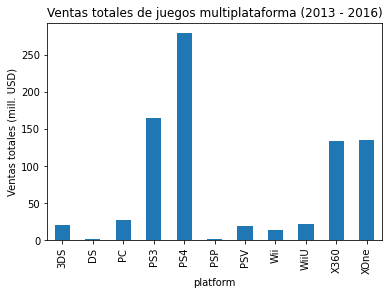

In [39]:
# Calculamos las ventas totales de juegos multiplataforma
games_relevant[games_relevant['name'].isin(xplatform_games)].groupby(by='platform').sum()['total_sales'].plot(kind='bar')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas totales de juegos multiplataforma (2013 - 2016)')
plt.show()

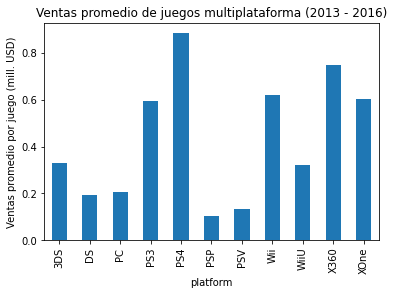

In [40]:
# Calculamos las ventas promedio de juegos multiplataforma
games_relevant[games_relevant['name'].isin(xplatform_games)].groupby(by='platform').mean()['total_sales'].plot(kind='bar')
plt.ylabel('Ventas promedio por juego (mill. USD)')
plt.title('Ventas promedio de juegos multiplataforma (2013 - 2016)')
plt.show()

Para terminar de recalcar el punto, podemos comparar por ventas totales y por ventas promedio a las plataformas que compiten de forma directa (por ejemplo PS4 vs XOne y PS3 vs X360).

Tomando como ejemplo el caso PS4 vs XOne. Es probable que compartan la mayoria de juegos (salvo exlcusivos de cada plataforma) y aun asi la PS4 presenta mayores ventas totales y mayores ventas promedio por juego. En el caso PS3 vs X360 no es tan claro, ya que la PS3 presenta mayores ventas totales, pero menores ventas promedio (tal vez por mayor cantidad de titulos no tan exitosos).

Finalmente, podemos decir que en la mayoria de los casos las ventas varian de plataforma a plataforma. Al momento de hacer un modelo o pronostico de ventas de un videojuego, es necesario hacer el analisis por plataforma para tener una mejor prediccion del mercado.

Tambien podemos realizar un analisis comparativo contra solo una de las otras platformas lideres y comparar los resultados con los obtenidos anterioremente. Esta comparacion la haremos en la XOne y utilizaremos solo los juegos que comparte con la PS4.


In [41]:
# Generamos una tabla con todos los juegos que estan presentes tanto en PS4 como en XOne, extraemos las ventas y los puntajes
ps4_xone_games_sales_n_score = pd.pivot_table(games_relevant[(games_relevant['name'].isin(xplatform_games)) & 
              (games_relevant['critic_score'].notna()) & 
              (games_relevant['user_score'].notna()) &                                              
              ((games_relevant['platform'] == 'PS4') |
              (games_relevant['platform'] == 'XOne'))],
               index='name', columns='platform', aggfunc='sum',
               values=['total_sales', 'critic_score', 'user_score']).dropna()
ps4_xone_games_sales_n_score

critic_score       total_sales        \
platform                                   PS4  XOne         PS4  XOne   
name                                                                     
7 Days to Die                             45.0  35.0        0.14  0.05   
Agatha Christie's The ABC Murders         67.0  66.0        0.02  0.01   
Alien: Isolation                          79.0  78.0        1.12  0.50   
Angry Birds Star Wars                     47.0  53.0        0.22  0.17   
Assassin's Creed Syndicate                76.0  78.0        3.39  1.29   
...                                        ...   ...         ...   ...   
Wolfenstein: The New Order                79.0  79.0        1.54  0.68   
Wolfenstein: The Old Blood                76.0  75.0        0.43  0.15   
Worms: WMD                                78.0  75.0        0.03  0.01   
XCOM 2                                    88.0  87.0        0.14  0.04   
Zombie Army Trilogy                       62.0  62.0        0.20  0.11   

                                  user_score       
platform                                 PS4 XOne  
name                                               
7 Days to Die                            5.9  5.2  
Agatha Christie's The ABC Murders        6.2  7.5  
Alien: Isolation                         8.1  7.8  
Angry Birds Star Wars                    2.0  6.9  
Assassin's Creed Syndicate               6.8  6.1  
...                                      ...  ...  
Wolfenstein: The New Order               8.1  7.8  
Wolfenstein: The Old Blood               8.0  8.0  
Worms: WMD                               7.6  8.1  
XCOM 2                                   8.0  8.1  
Zombie Army Trilogy                      6.8  7.2  

[142 rows x 6 columns]

Correlacion:  0.39853288477102017


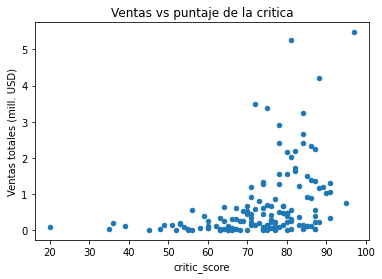

In [73]:
# Generamos un grafico de dispersion entre ventas y puntaje de la critica y calculamos la correlacion
(
ps4_xone_games_sales_n_score
.iloc[:, ps4_xone_games_sales_n_score.columns.get_level_values(1) == 'XOne']
    .plot(kind='scatter', x='critic_score', y='total_sales')   
)
plt.xlabel('Puntaje de la critica')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas (XOne) vs puntaje de la critica')

print('Correlacion: ', 
ps4_xone_games_sales_n_score
.iloc[:, ps4_xone_games_sales_n_score.columns.get_level_values(1) == 'XOne'][['critic_score', 'total_sales']].
      corr().iloc[0,1]
)

Vemos nuevamente que el puntaje de la critica esta ligeramente correlacionado con las ventas, con un valor de R cercano al caso anterior (R aprox 0.4).

Correlacion:  -0.17987102411525857


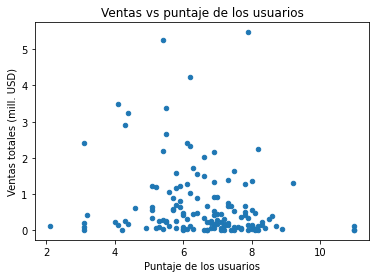

In [74]:
# Generamos un grafico de dispersion entre ventas y puntaje de los usuarios y calculamos la correlacion
(
ps4_xone_games_sales_n_score
.iloc[:, ps4_xone_games_sales_n_score.columns.get_level_values(1) == 'XOne']
    .plot(kind='scatter', x='user_score', y='total_sales')
)
plt.xlabel('Puntaje de los usuarios')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas (XOne) vs puntaje de los usuarios')

print('Correlacion: ', 
ps4_xone_games_sales_n_score
.iloc[:, ps4_xone_games_sales_n_score.columns.get_level_values(1) == 'XOne'][['user_score', 'total_sales']].
      corr().iloc[0,1]
)

Interesantemente vemos que existe una correlacion negativa entre ventas de juegos de la XOne y el puntaje de los usuarios. Esto ya habia sido observado en el caso de la PS4, mas la correlacion era bastante menor (en un factor aproximado de 5).

De todas maneras, podemos apreciar que la correlacion entre el puntaje de la critica y las ventas de videojuegos es mucho mas fuerte que la del puntaje de los usuarios.

Es bueno tener usuarios felices, mas parece mas importante caerle bien a la critica (en terminos de ventas).

Es importante en esta seccion mencionar que la correlacion entre dos variables no necesariamente implica causalidad. Existen muchos otros mas factores que afectan las ventas, ademas de las criticas, que no estan siendo considerados en este analisis.

Esta bien tenerlo en cuenta como referencia, pero creer que juegos con mejores resenhas de los criticos se va a traducir directamente a mayor cantidad de ventas seria una incorrecta interpretacion de los resultados.

### Ventas por genero

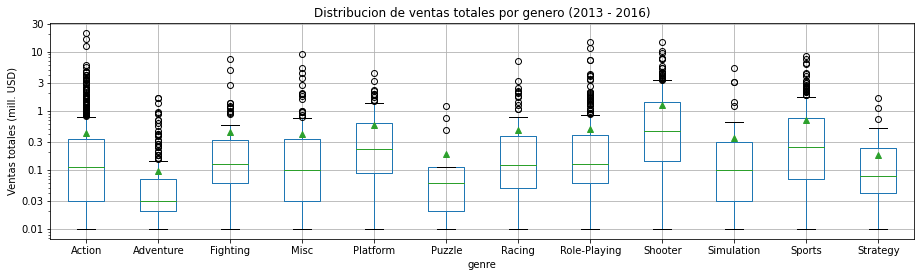

In [44]:
# Trzamos los diagramas de cajas de las ventas totales por cada genero
games_relevant.boxplot(column='total_sales', by='genre', figsize=(15, 4), showmeans=True)
plt.yscale('log')
plt.yticks(ticks=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], labels=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Distribucion de ventas totales por genero (2013 - 2016)')
plt.suptitle('')
plt.show()

Elaborando un diagrama de cajas de las distribuciones de las ventas totales por genero, incluyendo las medias, podemos sacar informacion importante respecto a la rentabilidad de cada uno de los generos. La escala logaritmica nos permite ampliar el rango para una mejor visualizacion.

Vemos que todos los generos cuentan con distribuciones sesgadas hacia la derecha, con medias cercanas y en la mayoria de casos superiores al valor del tercer cuartil. Esto nos indica que si deseamos evaluar la rentabilidad de un genero, es mas preciso enfocarnos en las medianas.

Las medianas de los generos oscilan bastante entre valores de 0.03 y 0.5 millones de dolares. Bajo esta metrica, el genero mas rentable de videojuegos es Shooter, seguido por Sports y Platform. Los generos menos rentables serian a su vez Adventure, seguido de Puzzle y Strategy.

Cabe recalcar que es mas conveniente analizar las medianas que las ventas totales de cada genero, ya que se busca determinar de rentabilidad de un juego cualquiera de cada genero. Si se analizacen solo las ventas totales por genero, estas estarian sesgadas ya que hay generos que venden mucha mayor cantidad de titulos que otros, mas no significa que cada titulo individual venda mas.

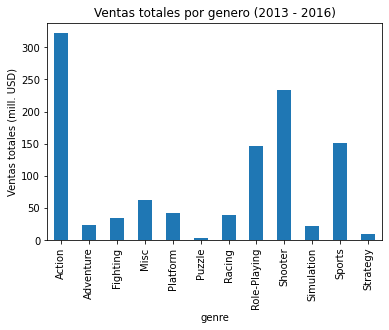

In [45]:
# Ploteamos un grafico de barras de las ventas totales de cada genero para probar el punto
games_relevant.groupby(by='genre').sum()['total_sales'].plot(kind='bar')
plt.ylabel('Ventas totales (mill. USD)')
plt.title('Ventas totales por genero (2013 - 2016)')
plt.show()

En el grafico de barras mostrado corroboramos lo mencionado anteriormente: los generos con mayores ventas totales no necesariamente tienen los juegos mas rentables.

Como ejemplo podemos poner el caso de Action vs Shooter. Los juegos de accion tienen una mayor cantidad de ventas totales, sin embargo un juego shooter es mas rentable que uno de accion (analizando las medianas). Esto es debido a que probablemente hay una mayor cantidad de titulos de juegos de accion que de shooter.

### Conclusiones Paso 3

Al analizar la cantidad ed juegos vendidos a los largo del tiempo, se pudo determinar que los datos de todos los periodos no son siginificativos, cada periodo tiene sus particularidades y solo debenmos tomar el rango de tiempo optimo que nos permita realizar el mejor analisis.

Luego de separa los datos por plataforma se pudo observar que las plataformas cuentan con un ciclo de vida de 9 anhos y medio: 3 anhos y medio en llegar a su pico en ventas, 6 anhos en dejar de tener ventas.

Con esta informacion, se pudo determinar que, para pronosticos y campanhas para el 2017, soo cuentan como datos relevantes aquellos partir del 2013. Esto toma en cuenta los ciclos de vida completos de las plataformas lideres: la PS4 y el XOne.

Una vez filtrados solo los datos del periodo relevante, se observa que las tres plataformas mas rentables en este periodo son la PS4, el XOne y la 3DS (aunque todas ellas presenten caidas en las ventas).

Si bien esas son las plataformas mas rentables, las medianas de las ventas de todas las plataformas (salvo PSVita) varian bastante poco. Esto parece indicar que las plataformas mas exitosas tienen mas titulos en su cartera y juegos que ganan bastante mas dinero que un juego comun y corriente.

Analizando mas a fondo solo a las plataformas exitosas, vemos que las ventas promedio entre estos no varia demasiado. El podio entre ellas esta influenciado principalmente por us juegos mas exitosos.

Buscando encontrar algun otro factor que influencia las ventas, se opta por analizar los puntajes de la critica y de los usuarios. Sin embargo, se encuentra que el puntaje de los usuarios esta muy poco correlacionado con las ventas y que el puntaje de la critica solo presenta una correlacion moderada.

Finalmente, se realizo un analisis para encontrar los generos mas rentables entre las plataformas. Para ello, es mas conveniente analizar las medianas que las ventas totales por genero (debido al sesgo hacia la derecha que existe en las distribuciones de ventas de juegos). Este analisis pudo determinar que los generos mas rentables mabo esta metrica serian: Shooter, Sports y Platform.

## Paso 4: Perfiles de usuario

Crear perfiles de usuario por region:
 - Determinar 5 plataformas principales y describir variaciones en cuotas de mercado
 - Determinar los generos principales y explicar diferencias
 - Efecto de la clasificacion ESRB

### Cuotas de mercado

In [46]:
# Determinamos la cantidad de ventas de cada region, por plataforma
platforms_sales_by_region = (
    games_relevant.groupby(by='platform')
    .sum()[['na_sales', 'eu_sales', 'jp_sales']]
)
platforms_sales_by_region


,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
DS,0.57,0.85,0.00
PC,11.11,25.36,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSP,0.00,0.17,3.29
PSV,5.04,6.10,18.59
Wii,6.56,5.93,0.05
WiiU,29.21,19.85,10.88


In [47]:
# Calculamos la cuota de mercado de cada plataforma por region
platforms_market_share_by_region = pd.DataFrame()
for region in platforms_sales_by_region.columns:
    platforms_market_share_by_region[region] = platforms_sales_by_region[region] / platforms_sales_by_region[region].sum()
platforms_market_share_by_region

,na_sales,eu_sales,jp_sales
platform,,,
3DS,0.087272,0.078933,0.481674
DS,0.001302,0.002167,0.000000
PC,0.025382,0.064656,0.000000
PS3,0.145073,0.172883,0.165862
PS4,0.248429,0.359712,0.113368
PSP,0.000000,0.000433,0.023370
PSV,0.011514,0.015552,0.132050
Wii,0.014987,0.015119,0.000355
WiiU,0.066734,0.050608,0.077284


In [48]:
# Filtramos las plataformas mas populares en NA
platforms_market_share_by_region.sort_values(by='na_sales', ascending=False).head()['na_sales']

platform
PS4     0.248429
XOne    0.212744
X360    0.186562
PS3     0.145073
3DS     0.087272
Name: na_sales, dtype: float64

In [49]:
# Filtramos las plataformas mas populares en EU
platforms_market_share_by_region.sort_values(by='eu_sales', ascending=False).head()['eu_sales']

platform
PS4     0.359712
PS3     0.172883
XOne    0.131530
X360    0.108406
3DS     0.078933
Name: eu_sales, dtype: float64

In [50]:
# Filtramos las plataformas mas populares en JP
platforms_market_share_by_region.sort_values(by='jp_sales', ascending=False).head()['jp_sales']

platform
3DS     0.481674
PS3     0.165862
PSV     0.132050
PS4     0.113368
WiiU    0.077284
Name: jp_sales, dtype: float64

Luego de determinar las 5 plataformas mas populares (por cantidad de ventas totales) en cada region, podemos apreciar que en la region NA y EU se tratan de las mismas plataformas (en diferente orden). Esto no es tan sorprendente, ya que los mercados occidentales suelen tener ciertas similitudes en cuanto a comportamientos de compra. El mercado japones si es bastante distinto, podemos observar que alli priman las plataformas mobiles ante las consolas de mesa.

Para la PS4:
 - En NA y EU, es la plataforma mas popular con 25% y 36% de cuota de mercado
 - Es decir, en NA representa 1/4 de las ventas totales y en EU mas de 1/3 de las ventas totales
 - En contraste, en JP la PS4 representa poco mas de 1/10de las ventas
 
Para el XOne:
 - Representa aprox. 1/6 de las ventas totales en NA
 - En EU, poco mas de 1/8 de las ventas totales
 - En Japon no es popular, prima su principal competidor (que es ademas una empresa local)
 
Para el X360:
 - En NA representa casi 1/5 de las ventas totales
 - En EU es menos popular, poco mas de 1/10 de las ventas totales
 - En JP no es popular, misma historia que la XOne
 
Para la PS3:
 - Es la plataforma con cuota de mercado mas homogenea entre las regiones
 - 15% de cuota de mercado en NA
 - 17% de cuota de mercado en EU
 - 17% de cuota de mercado en JP (unico mercado donde la PS3 vence a la PS4)
 
Para la 3DS:
 - Cuota de mercado homogenea en NA y EU
 - 9% de cuota de mercado en NA
 - 8% de cuota de mercado en EU
 - Plataforma mas popular en JP
 - 48% de cuota de mercado en Japon
 - Ninguna plataforma supera esta cuota de mercado en ninguna region
 
Para la PSV:
 - No es popular en NA ni en EU
 - 13% de cuota de mercado en JP, superior a la PS4

Para la WiiU:
 - No es popular en NA ni en EU
 - 8% de cuota de mercado en JP
 
Al observar detenidamente estos resultados podemos sacar ciertas conclusiones:
 - El consumidor del mercado de NA busca principalmente las plataformas mas potentes que el mercado puede ofrecer. Adicionalmente, le gustan las consolas de mano.
 - El consumidor del mercado de EU tambien busca plataformas potentes, mas prioriza a Sony antes que a Microsoft en su eleccion, incluso si se trata de plataformas de la generacion anterior (la PS3 le gana en ventas al XOne).
 - El consumidor japones aprecia bastante el consumo a empresas locales (Nintendo y Sony) y le encantan las consolas portatiles.

### Generos

In [51]:
# Determinamos las ventas totales de cada region, por genero
(
    games_relevant.groupby(by='genre')
    .sum()[['na_sales', 'eu_sales', 'jp_sales']]
)

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Adventure,7.14,8.25,5.82
Fighting,15.55,8.55,7.65
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79
Puzzle,0.83,1.00,1.18
Racing,12.96,20.19,2.30
Role-Playing,46.40,36.97,51.04
Shooter,109.74,87.86,6.61


In [52]:
# Encontramos los generos mas populares en NA
(
    games_relevant.groupby(by='genre')
    .sum()[['na_sales', 'eu_sales', 'jp_sales']]['na_sales']
    .sort_values(ascending=False)
    .head()
)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [53]:
# Encontramos los generos mas populares en EU
(
    games_relevant.groupby(by='genre')
    .sum()[['na_sales', 'eu_sales', 'jp_sales']]['eu_sales']
    .sort_values(ascending=False)
    .head()
)

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [54]:
# Encontramos los generos mas populares en JP
(
    games_relevant.groupby(by='genre')
    .sum()[['na_sales', 'eu_sales', 'jp_sales']]['jp_sales']
    .sort_values(ascending=False)
    .head()
)

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

Vemos nuevamente que los perfiles de los consumidores occidentales son bastante similares. Las regiones NA y EU comparten 4 de los 5 generos mas populares, solo variando en el 5to puesto (Misc en NA vs Racing en EU). Es conveniente analizar estos dos mercados a la par.

El consumidor occidental (regiones NA y EU) gusta principalmente de juegos de accion y shooters (los de NA gustan mas de los shooters que los de EU en proporcion). Tambien disfruta de juegos de deportes y de rol. Por ultimo, gusta de juegos miscelaneos (aunque el consumidor europeo prefiere los de carreras un poquito mas).

En contraste, el consumidor japones tambien disfruta de los juegos de accion, mas prefiere los de rol. Luego de estos generos, sus gustos no son tan fuertes, es atraido por juegos miscelaneos y shooters tambien asi como juegos de pelea.

### Clasificaciones ESRB

In [55]:
# Calculamos las ventas de cada region, por clasificacion ESRB
games_relevant.groupby(by='rating').sum()[['na_sales', 'eu_sales', 'jp_sales']]

,na_sales,eu_sales,jp_sales
rating,,,
,89.42,78.91,85.05
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59


<AxesSubplot:>

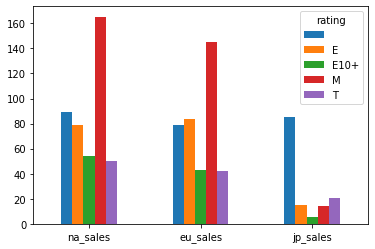

In [56]:
# Graficamos los datos de la tabla anterior, por region
games_relevant.groupby(by='rating').sum()[['na_sales', 'eu_sales', 'jp_sales']].transpose().plot(kind='bar', rot=0)

Vemos que en las regiones occidentales, la clasificacion con mayor cantidad de ventas de videojuegos es M, seguida por E. Podemos afirmar tambien que T y E10+ presentan un nivel similar de ventas.

En contraste, en Japon la clasificacion con mayor cantidad de ventas es T, mientras que M y E presentan un nivel similar de ventas. La clasificacion E10+ es la que posee menores ventas.

En las tres regiones, vemos que los videojuegos sin clasificacion presentan un nivel fuerte de ventas, asi como parecido entre regiones. No tomamos en cuenta estos datos mas que como 'ruido'. Es preciso notar que la falta de estos datos perjudica nuestro analisis, sobretodo en Japon que no tiene un nivel de ventas tan alto como las regiones de occidente.

### Conclusiones Paso 4

Con la informacion recaudada y el analisis hecho, se puede armar un perfil de usuario para cada region:

Consumidor de la region NA:
 - Gustan de plataformas potentes de ultima generacion
 - Juega principalmente juegos de accion y shooters
 - Sus juegos categoria M presentan violencia intensa y sangre
 - Campanha: juegos de accion y shooters violentos para PS4 y Xone
 
Consumidor de la region EU:
 - Gusta plataformas potentes, prefiere a Sony antes que a Microsoft (asi sea de la generacion anterior)
 - Tambien gusta de los juegos de accion y shooters (no tanto como en la region NA)
 - Igualmente sus juegos presentan violencia y sangre
 - Campanha: juegos de accion y shooters para PS4, PS3 y XOne
 
Consumidor de la region JP:
 - Solo consume plataformas japonesas, prefiere mobiles
 - Le encantan los juegos de rol y de accion
 - Sus juegos son menos violentos y con poca sangre
 - Campanha: juegos de rol y accion para 3DS y PS3

## Prueba de hipotesis

Probar las siguientes hipotesis:
- Las calificaciones promedio de los usuarios para XOne y PC son iguales
- Las calificaciones promedio de los usuarios para Accion y Deportes son diferentes

### Calificaciones promedio para XOne y PC

In [57]:
# Obtenemos la informacion de calificaciones de los usuarios para cada plataforma, excluimos juegos sin calificacion
user_score_xone = games_relevant[(games_relevant['platform'] == 'XOne') & (games_relevant['user_score'].notna()) & (games_relevant['user_score'] <= 10)]['user_score']
user_score_pc = games_relevant[(games_relevant['platform'] == 'PC') & (games_relevant['user_score'].notna()) & (games_relevant['user_score'] <= 10)]['user_score']

print('Cantidad de calificaciones de usuario para XOne: ' , user_score_xone.size)
print('Cantidad de calificaciones de usuario para PC: ' , user_score_pc.size)
print()
print('Calificacion promedio de usuarios para XOne: ', round(user_score_xone.mean(), 2))
print('Calificacion promedio de usuarios para PC: ', round(user_score_pc.mean(), 2))
print()
print('Desv.std de calificaciones de usuarios para XOne: ', round(user_score_xone.std(), 2))
print('Desv.std de calificaciones de usuarios para PC: ', round(user_score_pc.std(), 2))

Cantidad de calificaciones de usuario para XOne:  182
Cantidad de calificaciones de usuario para PC:  155

Calificacion promedio de usuarios para XOne:  6.52
Calificacion promedio de usuarios para PC:  6.27

Desv.std de calificaciones de usuarios para XOne:  1.38
Desv.std de calificaciones de usuarios para PC:  1.74


Una observacion inicial nos muestra que las calificaciones promedio de los usuarios para ambas plataformas son bastante similares. Esto nos puede llevar a pensar que nuestra hipotesis es verdadera. Sin embargo, las desviaciones estandar son bastante altas (en relacion con las medias), de manera que a simple vista no hay forma de estar seguro. Siempre es necesario realizar una prueba de hipotesis para confirmar (o refutar) nuestra intuicion inicial.

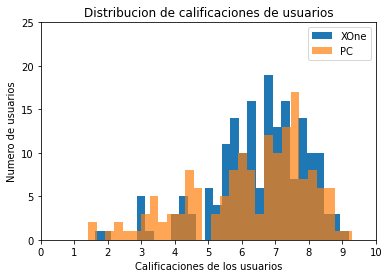

In [58]:
# Graficamos las distribuciones
user_score_xone.plot(kind='hist', alpha=1, bins=30)
user_score_pc.plot(kind='hist', alpha=0.7, bins=30)
plt.xlim(0,10)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Calificaciones de los usuarios')
plt.ylim(0, 25)
plt.ylabel('Numero de usuarios')
plt.legend(['XOne', 'PC'])
plt.title('Distribucion de calificaciones de usuarios')
plt.show()

Como era de esperarse, las distribuciones presentan bastante sobrelape y similitudes tamanho y forma. Podria ser el caso de que las medias sean iguales, mas tratandose de muestras existe la probabilidad de que estas muestran en particular sean parecidas cuando las distribuciones originales no necesariemente lo sean.

Formulamos las hipotesis:
 - Hipotesis nula H0: las calificaciones promedio para XOne y PC son iguales
 - Hipotesis alternativa H1: las calificaciones promedio para XOne y PC son diferentes
 - Umbral alpha: probabilidad de error tipo 1 (falso negativo: rechazar H0, siendo H0 verdadera), 5%
 - Valor p: probabiliad de obtener el resultado, asumiendo que H0 es cierta

In [59]:
# Efectuamos la prueba de hipotesis para dos poblaciones
alpha = 0.05 #alpha de 5%

results = st.ttest_ind(user_score_xone.tolist(), user_score_pc.tolist(), equal_var=False) # prueba la hipótesis de que las medias de dos poblaciones son iguales

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula: Rechazamos la hipotesis de que que las calificaciones promedio de XOne y PC sean iguales")
else:
    print("No podemos rechazar la hipótesis nula: No podemos rechazar la hipotesis de que las calificaciones promedio de XOne y PC sean iguales")

valor p: 0.14759594013430463
No podemos rechazar la hipótesis nula: No podemos rechazar la hipotesis de que las calificaciones promedio de XOne y PC sean iguales


Nuestra intuicion fue correcta, parece que las calificaciones promedio de los usuarios para ambas plataformas son iguales. Era un resultado esperado, las medias de las muestras eran muy parecidas y las distribuciones mostraban bastante sobrelapamiento.

Observando el valor p, si las calificaciones promedio son iguales, existe un 15% de probabilidad de obtener esa ligera diferencia en las medias. En terminos de pruebas de hipotesis, es una probablidad no despreciable.

No tenemos motivos suficientes para decir que las calificaciones promedio de los usuarios para XOne y PC sean diferentes (no tenemos motivos para aceptar H1).

### Calificaciones promedio para Accion y Deportes

In [62]:
# Obtenemos la informacion de calificaciones de los usuarios para cada plataforma, excluimos juegos sin calificacion
user_score_action = games_relevant[(games_relevant['genre'] == 'Action') & (games_relevant['user_score'].notna()) & (games_relevant['user_score'] <= 10)]['user_score']
user_score_sports = games_relevant[(games_relevant['genre'] == 'Sports') & (games_relevant['user_score'].notna()) & (games_relevant['user_score'] <= 10)]['user_score']

print('Cantidad de calificaciones de usuario para Accion: ' , user_score_action.size)
print('Cantidad de calificaciones de usuario para Deportes: ' , user_score_sports.size)
print()
print('Calificacion promedio de usuarios para Accion: ', round(user_score_action.mean(), 2))
print('Calificacion promedio de usuarios para Deportes: ', round(user_score_sports.mean(), 2))
print()
print('Desv.std de calificaciones de usuarios para Accion: ', round(user_score_action.std(), 2))
print('Desv.std de calificaciones de usuarios para Deportes: ', round(user_score_sports.std(), 2))

Cantidad de calificaciones de usuario para Accion:  389
Cantidad de calificaciones de usuario para Deportes:  160

Calificacion promedio de usuarios para Accion:  6.84
Calificacion promedio de usuarios para Deportes:  5.24

Desv.std de calificaciones de usuarios para Accion:  1.33
Desv.std de calificaciones de usuarios para Deportes:  1.78


A primera vista podemos notar un par de cambios respecto a la situacion anterior:
 - la cantidad de muestras es muy distinta
 - la diferencia en medias esta alrededor de una desviacion estandar

Esto puede llevarnos a pensar que las medias de las poblaciones son tambien diferentes, mas no podemos estar seguros aun. Visualizar las distribuciones dara mas luz a nuestros instintos.

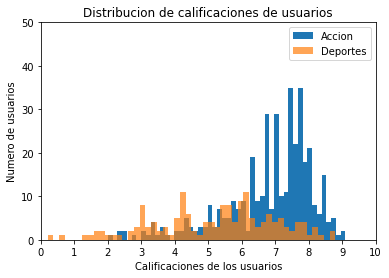

In [68]:
# Graficamos las distribuciones
user_score_action.plot(kind='hist', alpha=1, bins=50)
user_score_sports.plot(kind='hist', alpha=0.7, bins=50)
plt.xlim(0,10)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Calificaciones de los usuarios')
plt.ylim(0, 50)
plt.ylabel('Numero de usuarios')
plt.legend(['Accion', 'Deportes'])
plt.title('Distribucion de calificaciones de usuarios')
plt.show()

Luego de visualizar las distribuciones podemos observar que:
 - no hay similitud en tamanho
 - no hay simulitud en forma
 
Si bien existe cierto sobrelape, este es bastante pobre. La distribucion de deportes esta bastante distribuida (valga la redundancia) en todo el rango de puntuacion, mientras que la de accion esta claramente acumulada alrededor de entre 7 y 8, con una cola tirada hacia las puntuaciones mas bajas (lo que reduce su media).

Es probable que nuestra intuicion inicial de que las medias de las poblaciones son distintas fuese correcta. De todas maneras siempre es bueno corroborarlo formalmente con una prueba de hipotesis.

Formulamos las hipotesis:
 - Hipotesis nula H0: las calificaciones promedio para Accion y Deportes son iguales
 - Hipotesis alternativa H1: las calificaciones promedio para Accion y Deportes son diferentes
 - Umbral alpha: probabilidad de error tipo 1 (falso negativo: rechazar H0, siendo H0 verdadera), 5%
 - Valor p: asumiendo que H0 es cierta, probabiliad de obtener dicho resultado

In [70]:
# Efectuamos la prueba de hipotesis para dos poblaciones
alpha = 0.05 #alpha de 5%

results = st.ttest_ind(user_score_action.tolist(), user_score_sports.tolist(), equal_var=False) # prueba la hipótesis de que las medias de dos poblaciones son iguales

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula: Rechazamos la hipotesis de que que las calificaciones promedio de Accion y Deportes sean iguales")
else:
    print("No podemos rechazar la hipótesis nula: No podemos rechazar la hipotesis de que las calificaciones promedio de Accion y Deportes sean iguales")

valor p: 1.4460039700704315e-20
Rechazamos la hipótesis nula: Rechazamos la hipotesis de que que las calificaciones promedio de Accion y Deportes sean iguales


Nuestra intuicion dio en el clavo otra vez! Las calificaciones promedio de los usuarios para Accion y Deportes no son iguales, son diferentes. Era un resultado esperado, las distribuciones eran bastante distintas y las muestras suficientemente grandes para pensar que sus distribuciones se asemejan a la de la poblacion

Observando el valor p, si las calificaciones promedio fuesen iguales, existe solo un 0.0000000000000000001% de probabilidad de obtener los resultados que obtuvimos de las muestras dadas. Es una probabilidad practicamente nula!

Tenemos motivos mas que suficientes para decir que las calificaciones promedio de los usuarios para Accion y PC son diferentes (aceptamos H1).

### Conclusiones Paso 5

Luego de formular las hipotesis correspondientes (H0: las medias de las poblaciones son iguales, H1: las medias de las poblaciones son distintas, segun lo planteado en la prueba de hipotesis utilizando la t de student) y un umbral alpha adecuado (convecionalmente 5%) se puede concluir lo siguiente:
 - No tenemos motivos para pensar que las calificaciones promedio para XOne y PC sean diferentes
 - Tenemos motivos suficientes para pensar que las calificaciones promedio para Accion y Deportes son diferentes
 
Dados los valores p obtenidos en la prueba de hipotesis, se puede repetir el experimento con un valor bastante mas bajo (1% o 0.1% inclusive) y esto no alteraria los resultados del experimento:
 - 0.15 seguiria siendo mayor que alpha y la hipotesis nula seguiria sin ser rechazada en el primer caso
 - 1e-20 seguiria siendo menor que alpha y la hipotesis nula seguiria siendo rechazada en el segundo caso
 
Finalmente, realizar un analisis exploratorio inicial es clave para darnos una idea del posible resultado y poder dar una adecuada interpretacion. En ambos casos los resultados de la prueba de hipotesis concuerdan con nuestras intuiciiones inicuales luego de observar los estadisticos y las distribuciones.

## Conclusiones Generales

Dados los datos obtenidos y los analisis realizados, podemos sacar las siguientes conclusiones:

 - El periodo mas relevante para el analisis es 2013-2016: toma en cuenta el ciclo de vida completo de la PS4 y XOne, plataformas lideres.
 - Las plataformas tienen un periodo de vida de alrededor de 9 anhos y medio, de los cuales les toma 3 anhos y medio llegar a su pico en ventas y de ahi demoran 6 anhos en desaparecer.
 - Las plataformas exitosas difieren de las no exitosas por cantidad de titulos lanzados y juegos con ventas millonarias. Este ultimo factor es determinante para la posicion que ocupa cada plataforma en el podio.
 - Los puntajes de la critica tienen una correlacion moderada con las ventas totales. Los puntajes de los usuarios se correlacionan entre poco y nada.
 - Los generos mas rentables son: Shooter, Sports y Platform. Es mas conveniente desarrollar en uno de estos generos, las probabilidades de exito son mayores.
 - Los consumidores occidentales difieren de los japoneses en preferencias de consolas, gustos en videojuegos y categoria de estos.
 - El consumidor occidental prefiere plataformas de ultima generacion y gusta juegos de accion y shooters con violencia y sangre.
 - El consumidor japones solo compra consolas localesy  prefiere plataformas mobiles asi como juegos de rol y de accion no muy violentos y con poca sangre
 - Las calificaciones promedio de usuarios para juegos de la PC y XOne son iguales (no rechazamos que sean distintas)
 - Las calificaciones promedio de usuarios para juegos de accion y deportes son diferentes.



En resumen, para este proximo anho 2017 la empresa debe enfocarse en la PS4 y la XOne (y tratar de exprimir a la 3DS en sus utilmos anhos de vida). Se debe priorizar juegos con altas ventas de los generos Shooter, Sports y Platform.

En campanhas locales se deben enfocar en juegos de Accion y Shooters violentos y sangrientos para occidente (en la PS4 y XOne), y juegos de rol y de accion poco violentos para Japon (en la 3DS).

Se sugiere no dejar de lado a la PC, ya que es la unica plataforma que no muere, mas no es una prioridad.

Muchas gracias!